In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
file_path = 'weather.csv'
df = pd.read_csv(file_path)

In [4]:
df = df[pd.notnull(df['Tm'])]
df = df.reset_index(drop=True)

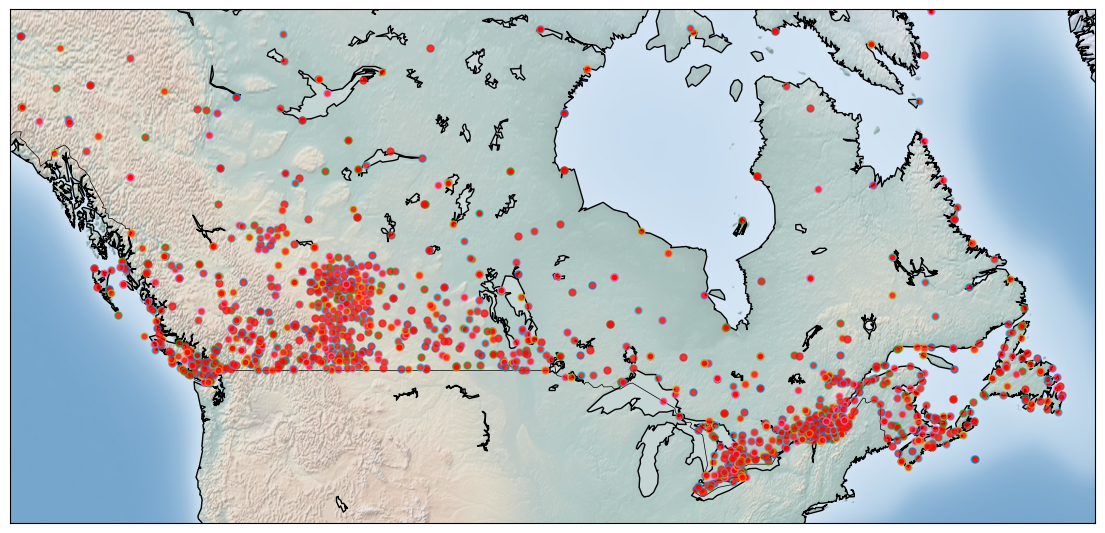

In [5]:
def plot_map(df):
    rcParams['figure.figsize'] = (14, 10)

    llon = -140
    ulon = -50
    llat = 40
    ulat = 65

    df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) & (df['Lat'] < ulat)]

    my_map = Basemap(
        projection='merc',
        resolution='l',
        area_thresh=1000.0,
        llcrnrlon=llon,
        llcrnrlat=llat,  # min longitude (llcrnrlon) and latitude (llcrnrlat)
        urcrnrlon=ulon,
        urcrnrlat=ulat
    )  # max longitude (urcrnrlon) and latitude (urcrnrlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    # my_map.drawmapboundary()
    my_map.fillcontinents(color='white', alpha=0.3)
    my_map.shadedrelief()

    # To collect data based on stations

    xs, ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
    df['xm'] = xs.tolist()
    df['ym'] = ys.tolist()

    # Visualization1
    for index, row in df.iterrows():
        #   x,y = my_map(row.Long, row.Lat)
        my_map.plot(
            row.xm,
            row.ym,
            markerfacecolor=([1, 0, 0]),
            marker='o',
            markersize=5,
            alpha=0.75
        )

    # plt.text(x,y,stn)
    plt.show()

    return ((llon, ulon, llat, ulat), df)

(llon, ulon, llat, ulat), df = plot_map(df.copy())


In [14]:
Clus_dataSet = df[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)

scaler = StandardScaler()
Clus_dataSet = scaler.fit_transform(Clus_dataSet)

Clus_dataSet

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.46577713,  1.86125634],
       [ 1.64788589,  0.95789607],
       [ 1.2814717 ,  0.53978899]])

In [16]:
db = DBSCAN(eps=0.15, min_samples=10)
db.fit(Clus_dataSet)

DBSCAN(eps=0.15, min_samples=10)

In [8]:
print(set(db.labels_)) # unique clusters
db.labels_

{0, 1, 2, 3, 4, -1}


array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64)

In [10]:
labels = db.labels_
df['Clus_Db'] = labels
df[['Clus_Db']].head()

Clus_Db
0        0
1        0
2        0
3        0
4        0

In [11]:
# Number of clusters in labels, ignoring noise if present.
realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)

# Remove repetition in labels by turning it into a set.
clusterNum = len(set(labels))

# A sample of clusters
df[['Stn_Name', 'Tx', 'Tm', 'Clus_Db']].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [12]:
set(labels)


{-1, 0, 1, 2, 3, 4}